In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import skimage
from skimage import io
import os
import cv2
#img = io.imread('image.png', as_gray=True)
test_name='7_A02'
dir='D:/OneDrive/PHD/Martyna-probki_z_karbem_05-2021/frame_7_dni_2021-05-18_5fps/'+test_name+'/'

In [99]:
def get_all_IMG(dir,x1,x2,y1,y2):
    #""" Return a list of the video filename from a directory and its subdirectories """
    dir_path=dir
    list_IMG_fn = []
    for dirpath, dirnames, filenames in os.walk(dir):
        print(dirpath)
        i=0
        for filename in [f for f in filenames]:
            
            if filename.endswith("jpg"):
                #im = io.imread(dir + filename,as_gray=True) #import obrazow w szarych odcieniach
                #im = im.T#odwrócenie zdjęcia do pionu
                #x1=200
                #x2=1700
                #y1=400
                #y2=650
                #cropped_im = im[x1:x2,y1:y2]
                image = cv2.imread(dir+filename)
                gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                rot_image = cv2.rotate(gray, cv2.cv2.ROTATE_90_COUNTERCLOCKWISE)
                crop_img = rot_image[y1:y2, x1:x2]
                #rot_image = cv2.rotate(crop_img, cv2.cv2.ROTATE_90_COUNTERCLOCKWISE) 
                #image = cv2.imread('C:/Users/N/Desktop/Test.jpg')
                #im = np.array(cropped_im * 255, dtype = np.uint8)
                #threshed = cv2.adaptiveThreshold(im, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 0)
                #cropped_im=im
                #print(i)
                #i=i+1

                list_IMG_fn.append(crop_img)
            
        #print(list_IMG_fn)    
        #print('len of list='+str(len(list_IMG_fn)))   
    return list_IMG_fn

def onMouse(event, x, y, flags, param):
    global posList
    global posArray
    if event == cv2.EVENT_LBUTTONDOWN:
        #posList.append((x, y))
        z = np.array([[x,y]], np.float32)
        print(z)
        posArray=np.concatenate((posArray, z), axis=0)
def onMouse0(event, x, y, flags, param):
    global zeroPoint
    if event == cv2.EVENT_LBUTTONDOWN:
        zeroPoint = np.array([[x,y]], np.float32)
        print(zeroPoint)

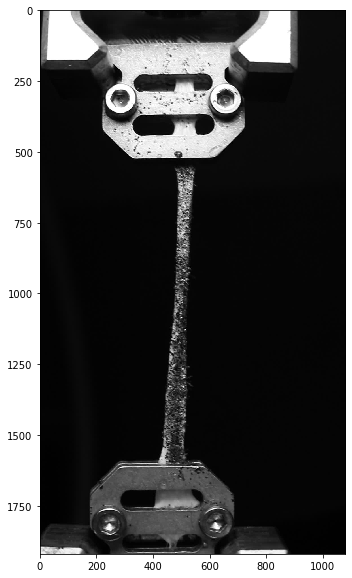

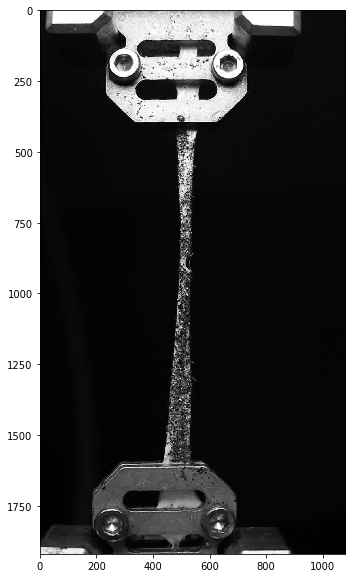

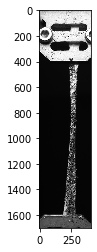

In [101]:


image = cv2.imread(dir+'video-frame-000001.jpg')
image = cv2.rotate(image, cv2.cv2.ROTATE_90_COUNTERCLOCKWISE)
plt.figure(figsize=(20,10))
plt.imshow(image)
plt.show()
image = cv2.imread(dir+'video-frame-000180.jpg') #dalsze zdjęcie, żeby znaleźć karb
image = cv2.rotate(image, cv2.cv2.ROTATE_90_COUNTERCLOCKWISE)
plt.figure(figsize=(20,10))
plt.imshow(image)
plt.show()
y1=0 #parametry wycięcia
y2=1700
x1=250
x2=650
image = image[y1:y2, x1:x2]
plt.imshow(image)
plt.show()


D:/OneDrive/PHD/Martyna-probki_z_karbem_05-2021/frame_7_dni_2021-05-18_5fps/7_A02/


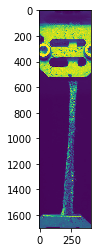

In [102]:
from PIL import Image
list_IMG=get_all_IMG(dir,x1,x2,y1,y2)
#print(list_IMG)
im_test=list_IMG[0]
#im_test = Image.fromarray(im_test)
#print(im_test)
plt.imshow(im_test)
plt.show()


In [103]:
#############################################
#############Wyznacz punkt "0"###############
#W miejscu gdzie próbka "wychodzi" z uchwytu#

img2 = np.array(im_test)
#cv2.namedWindow('image')
cv2.namedWindow('image',cv2.WINDOW_NORMAL)
#cv2.setWindowProperty('image', cv2.WND_PROP_FULLSCREEN, cv2.WINDOW_FULLSCREEN)
cv2.setMouseCallback('image',onMouse0)  
cv2.imshow("image", img2)
cv2.waitKey(0)
cv2.destroyAllWindows()
#print(zeroPoint)

[[ 209. 1613.]]


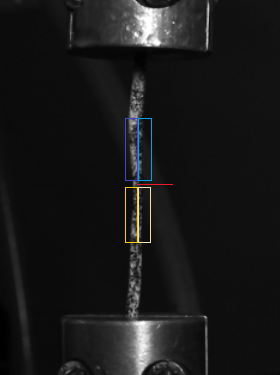

In [ ]:
##############################################################################################################
#Pierwszy punkt wyznacz byle jak - z jakiś przyczyn zawsze coś dziwnego z nium się dzieje -kij wie czemu######
#Kolejne punkty wyznacz według poniższej procedury.###########################################################
#Wyznacz punkt- 24 punkty zaczynając od lewego dolnego rogu idąć w prawo i potem lewo wyżej, prawo wyżej itd.#
#Po 6(3) punkty w każdy z 4 obszarów(lewy pod karbem, prawy pod karbem, lewy nad karbem, prawy nad karbem)####
#Wyznacz do datkowe 2 punkty powyżej scięgna na uchwycie - to odkształcenie powinno być równe temu z Instrona#
##############################################################################################################
posArray=np.array([[0,0]], np.float32)
print(posArray)
posList = []
img2 = np.array(im_test)
#cv2.namedWindow('image')
cv2.namedWindow('image',cv2.WINDOW_NORMAL)
#cv2.setWindowProperty('image', cv2.WND_PROP_FULLSCREEN, cv2.WINDOW_FULLSCREEN)
cv2.setMouseCallback('image',onMouse)
for i in range(8):  
    cv2.imshow("image", img2)
cv2.waitKey(0)
cv2.destroyAllWindows()
n,c=np.shape(posArray)
posArray = posArray.reshape((n, 1,2))
#print(posArray) #polecam 2 ostatnie próbki wyznaczyć na elemencie stalowym do weryfikacji przebiegu
                 #powinne pokazać prostą linię

[[0. 0.]]
[[  49. 1502.]]
[[ 209. 1239.]]
[[ 261. 1228.]]
[[ 209. 1187.]]
[[ 261. 1174.]]
[[ 219. 1136.]]
[[ 256. 1121.]]
[[ 224. 1088.]]
[[ 258. 1093.]]
[[ 224. 1052.]]
[[ 258. 1047.]]
[[ 230. 1015.]]
[[ 261. 1015.]]
[[230. 942.]]
[[261. 944.]]
[[230. 905.]]
[[274. 903.]]
[[235. 871.]]


In [11]:
#Tworzymy listę odleglośc punktów od początku probki, 
#zeby uzyskac długości potrzebne do obliczenia odkształcenia
zeroPointY=zeroPoint[0,1]
#print(zeroPointY)
lenListY=[]
for n in range(np.shape(posArray)[0]-1):
    lenListY.append(abs(posArray[n+1,0,1]-zeroPointY))
print(lenListY)
zeroPointX=zeroPoint[0,0]
lenListX=[]
for n in range(np.shape(posArray)[0]-1):
    lenListX.append(abs(posArray[n+1,0,0]-zeroPointX))
print(lenListX)

[26.0, 392.0, 396.0, 426.0, 431.0, 469.0, 474.0, 504.0, 502.0, 532.0, 523.0, 579.0, 583.0, 650.0, 650.0, 685.0, 685.0, 719.0, 721.0, 760.0, 753.0, 788.0, 788.0, 825.0, 818.0, 1128.0, 1134.0]
[135.0, 27.0, 18.0, 27.0, 18.0, 27.0, 16.0, 34.0, 16.0, 27.0, 9.0, 37.0, 12.0, 34.0, 18.0, 34.0, 18.0, 30.0, 23.0, 27.0, 21.0, 25.0, 30.0, 14.0, 37.0, 80.0, 133.0]


In [12]:
# Parameters for lucas kanade optical flow
lk_params = dict( winSize  = (21,21),
                  maxLevel = 3,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

In [13]:
n=1#number of point 
df=pd.DataFrame({'Time' : range(0, len(list_IMG)-1 ,1)})
df=df/5
for n in range(np.shape(posArray)[0]-1):
    PrevPts=posArray[n,:]
    d = {'Point'+str(n)+'_x': [], 'Point'+str(n)+'_y': []}
    df0 = pd.DataFrame(data=d)
    for i in range(len(list_IMG)-1):
        prevImg=list_IMG[i]
        nextImg=list_IMG[i+1]
        nextPts, status, err= cv2.calcOpticalFlowPyrLK(prevImg, nextImg, PrevPts, None,**lk_params)
        nextPts = nextPts.reshape((1,1,2))#wymagany shape
        d = {'Point'+str(n)+'_x': [nextPts[0,0,0]], 'Point'+str(n)+'_y': [nextPts[0,0,1]]}
        df1 = pd.DataFrame(data=d)
        df0.append(df1, ignore_index=True)
        df0 = pd.concat([df0,df1], axis=0, ignore_index=True)
        df0.reset_index()     
        PrevPts = nextPts #jako PrevPts do następnej iteracji

    df=pd.concat([df,df0], axis=1)
    
    df['Point'+str(n)+'_y']=df['Point'+str(n)+'_y']-df['Point'+str(n)+'_y'].iloc[10]
    df['Point'+str(n)+'_y']=df['Point'+str(n)+'_y']*(-1)/lenListY[n] #uzyskujemy odkształcenie
    df['Point'+str(n)+'_x']=df['Point'+str(n)+'_x']-df['Point'+str(n)+'_x'].iloc[10]
    df['Point'+str(n)+'_x']=df['Point'+str(n)+'_x']*(-1)/lenListX[n]



In [14]:
print(df.head(200))
#Usuwanie felernej kolumny#
del df["Point0_x"]
del df["Point0_y"]

df.to_csv(test_name+".csv")

     Time  Point0_x  Point0_y  Point1_x  Point1_y  Point2_x  Point2_y  \
0     0.0  0.063516  0.386463  0.542020  0.019528  0.700992  0.022724   
1     0.2  0.025483 -0.088342  0.146418 -0.003546  0.166857 -0.005029   
2     0.4  0.005500 -0.026578  0.024082 -0.000451  0.010100 -0.000005   
3     0.6  0.001603 -0.017949  0.021938 -0.001406 -0.004065 -0.000576   
4     0.8  0.002328 -0.009225  0.032900 -0.000096  0.017865  0.000551   
..    ...       ...       ...       ...       ...       ...       ...   
188  37.6 -0.299118  2.520504  0.019290  0.000138 -0.037768  0.029651   
189  37.8 -0.289412  2.503663  0.023287  0.000289 -0.031371  0.029908   
190  38.0 -0.294663  2.606088  0.001828  0.007118 -0.044929  0.036779   
191  38.2 -0.302838  2.635428  0.001622  0.011360 -0.121067  0.042202   
192  38.4 -0.296327  2.790306  0.090939  0.021294 -0.027070  0.053189   

     Point3_x  Point3_y  Point4_x  ...  Point22_x  Point22_y  Point23_x  \
0    0.463782  0.021964  0.700229  ...   0.42870

In [15]:
df = pd.read_csv(test_name+'.csv', delimiter=',',decimal='.')

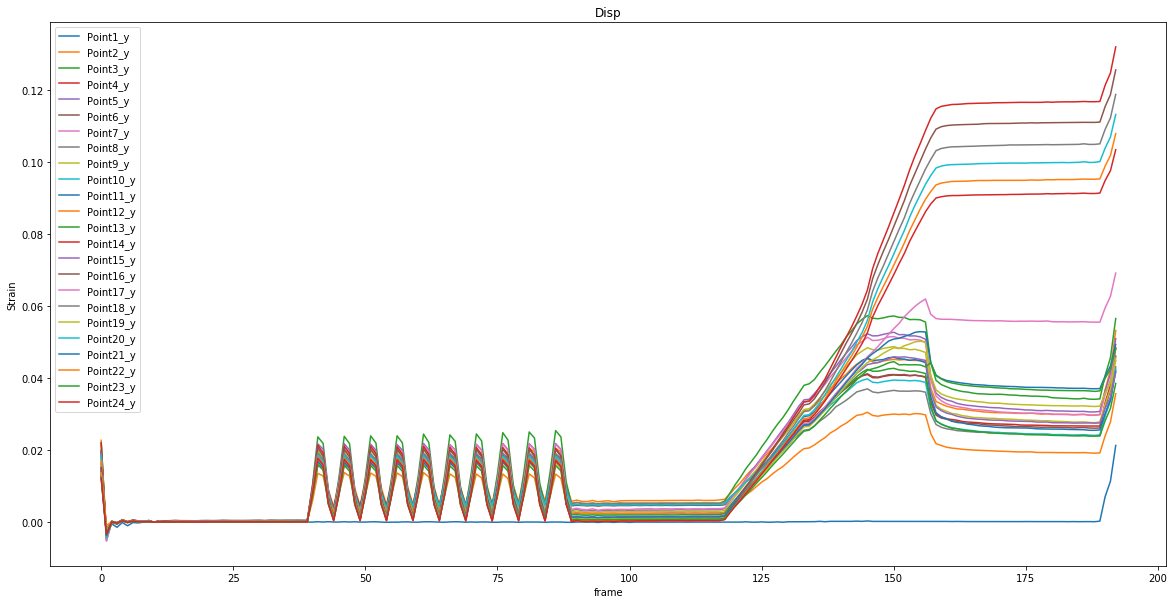

In [16]:

plt.figure(figsize=(20,10))
plt.ylabel('Strain')
plt.xlabel('frame')
plt.title('Disp')
#plt.xlim([50,250])
#plt.ylim([-0.1,0.5])
for n in range(np.shape(posArray)[0]-4):
    #print(n)

    plt.plot(df['Point'+str(n+1)+'_y'],label = 'Point'+str(n+1)+'_y')
plt.legend()
plt.show()

In [17]:
df = df.loc[110:]#obcinanie początku przebiegu - odczytaj z wykresu wyżej
#df.reset_index()
#df['Time']=df['Time']-df['Time'].iloc[0] #Zerowanie czasu
df=df-df.iloc[0]

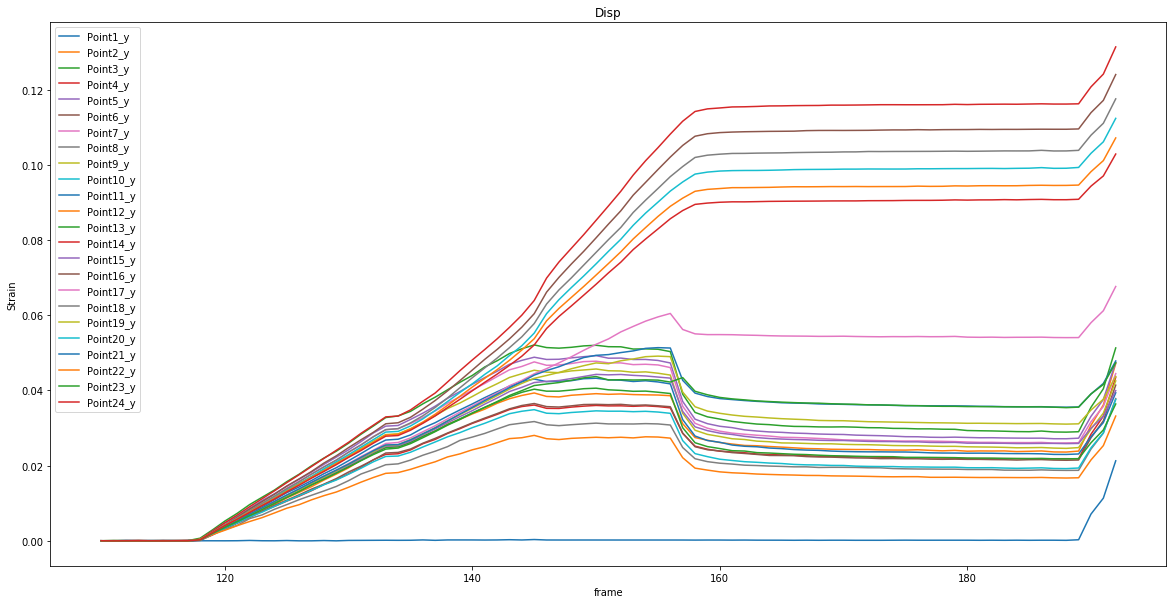

In [18]:
plt.figure(figsize=(20,10))
plt.ylabel('Strain')
plt.xlabel('frame')
plt.title('Disp')
#plt.xlim([50,250])
#plt.ylim([-0.1,0.5])
for n in range(np.shape(posArray)[0]-4):
    #print(n)

    plt.plot(df['Point'+str(n+1)+'_y'],label = 'Point'+str(n+1)+'_y')
plt.legend()
plt.show()

24
        0             1         2         3         4         5         6
110   0.0  0.000000e+00  0.000000  0.000000  0.000000  0.000000  0.000000
111   0.2 -1.245615e-06  0.000068 -0.000055 -0.000055 -0.000064 -0.000090
112   0.4  1.370177e-05  0.000047 -0.000045 -0.000012 -0.000007 -0.000025
113   0.6  3.114039e-07 -0.000018 -0.000057 -0.000002 -0.000012 -0.000027
114   0.8  1.463598e-05  0.000026 -0.000054 -0.000042 -0.000042 -0.000083
..    ...           ...       ...       ...       ...       ...       ...
183  14.6  1.205133e-04  0.029140  0.027348  0.026115  0.024849  0.023213
184  14.8  1.441800e-04  0.029045  0.027313  0.026123  0.024736  0.023185
185  15.0  1.214475e-04  0.029016  0.027290  0.026116  0.024761  0.023182
186  15.2  1.401317e-04  0.029191  0.027299  0.026166  0.024809  0.023134
187  15.4  1.395089e-04  0.028942  0.027146  0.025992  0.024654  0.022977

[78 rows x 7 columns]
        0         1         2         3         4         5         6
110   0.0  0.000

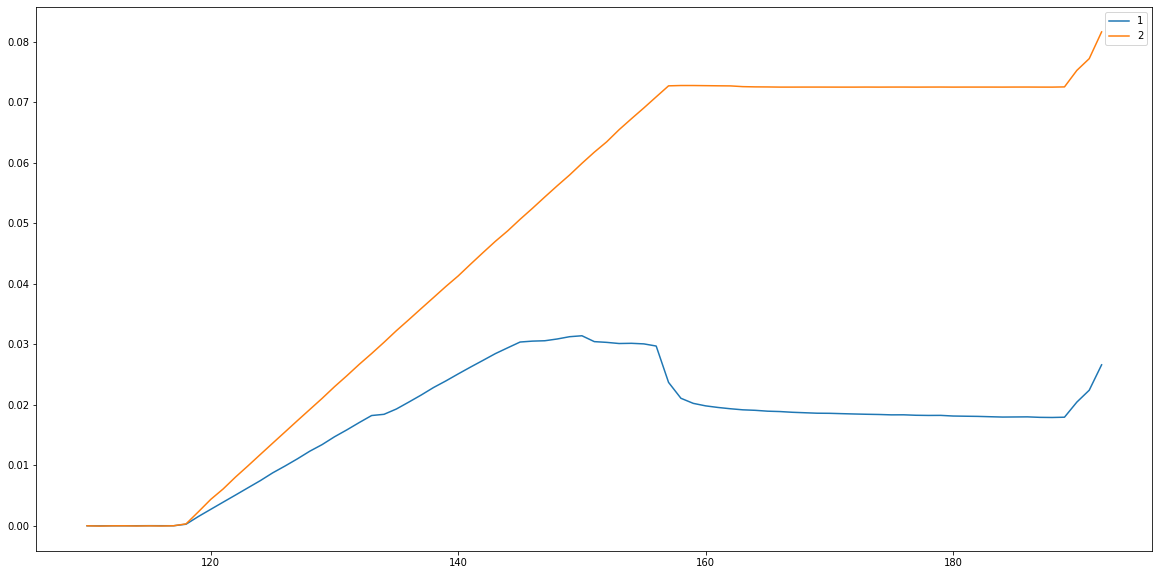

In [19]:
dfInstronVisionComparison=df["Time"]
dfAreaLeftDown=df["Time"]
dfAreaRightDown=df["Time"]
dfAreaLeftUp=df["Time"]
dfAreaRightUp=df["Time"]

a=np.shape(posArray)
a=a[0]-4
print(a)
a1=int(a/4)

for n in range(a1):
    #df0 = pd.concat([df0,df1], axis=0, ignore_index=True)
    dfAreaLeftDown=pd.concat([dfAreaLeftDown,df['Point'+str(2*n+1)+'_y']], axis=1, ignore_index=True)
    dfAreaRightDown=pd.concat([dfAreaRightDown,df['Point'+str(2*(n+1))+'_y']], axis=1, ignore_index=True)
    dfAreaLeftUp=pd.concat([dfAreaLeftUp,df['Point'+str(2*n+1+a1*2)+'_y']], axis=1, ignore_index=True)
    dfAreaRightUp=pd.concat([dfAreaRightUp,df['Point'+str(2*(1+n)+a1*2)+'_y']], axis=1, ignore_index=True)
    #print(2*n+1)
    #print(2*(n+1))
    #print(2*n+1+a1*2)
    #print(2*(1+n)+a1*2)

dfInstronVisionComparison=pd.concat([dfInstronVisionComparison,df['Point'+str(a+1)+'_y']], axis=1, ignore_index=True)
dfInstronVisionComparison=pd.concat([dfInstronVisionComparison,df['Point'+str(a+2)+'_y']], axis=1, ignore_index=True)

print(dfAreaLeftDown.head(-5))
print(dfAreaRightDown.head(-5))

plt.figure(figsize=(20,10))

plt.plot(dfInstronVisionComparison.iloc[:, 1],label = '1') #próbki testowe
plt.plot(dfInstronVisionComparison.iloc[:, 2],label = '2')
plt.legend()
plt.show()

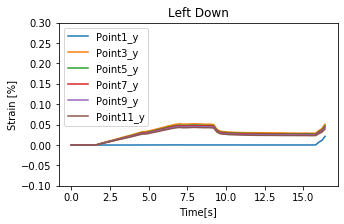

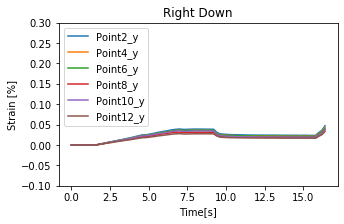

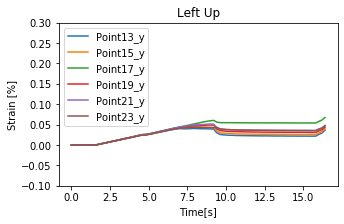

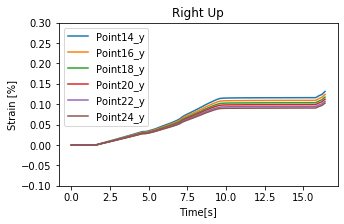

In [20]:


plt.figure(figsize=(5,3))
plt.ylabel('Strain [%]')
plt.xlabel('Time[s]')
plt.title('Left Down')
#plt.xlim([100,210])
plt.ylim([-0.1,0.3])
for n in range(a1):

    plt.plot(dfAreaLeftDown[0],dfAreaLeftDown[n+1],label = 'Point'+str(2*n+1)+'_y')
plt.legend()
plt.show()

plt.figure(figsize=(5,3))
plt.ylabel('Strain [%]')
plt.xlabel('Time[s]')
plt.title('Right Down')
#plt.xlim([100,210])
plt.ylim([-0.1,0.3])
for n in range(a1):

    plt.plot(dfAreaRightDown[0],dfAreaRightDown[n+1],label = 'Point'+str(2*(n+1))+'_y')
plt.legend()
plt.show()

plt.figure(figsize=(5,3))
plt.ylabel('Strain [%]')
plt.xlabel('Time[s]')
plt.title('Left Up')
#plt.xlim([100,210])
plt.ylim([-0.1,0.3])
for n in range(a1):

    plt.plot(dfAreaLeftUp[0],dfAreaLeftUp[n+1],label = 'Point'+str(2*n+1+a1*2)+'_y')
plt.legend()
plt.show()

plt.figure(figsize=(5,3))
plt.ylabel('Strain [%]')
plt.xlabel('Time[s]')
plt.title('Right Up')
#plt.xlim([100,210])
plt.ylim([-0.1,0.3])
for n in range(a1):

    plt.plot(dfAreaRightUp[0],dfAreaRightUp[n+1],label = 'Point'+str(2*(n+1)+a1*2)+'_y')
plt.legend()
plt.show()

     Time        x1_max    y1_max    x2_max    y2_max     y_max     x_max  \
110   0.0  0.000000e+00  0.000000  0.000000  0.000000  0.000000  0.000000   
111   0.2  6.791236e-05  0.000038 -0.000019 -0.000021 -0.000059 -0.000087   
112   0.4  4.728075e-05  0.000033  0.000050  0.000021 -0.000012  0.000003   
113   0.6  3.114039e-07  0.000081  0.000035  0.000052 -0.000029  0.000034   
114   0.8  2.578950e-05  0.000032  0.000030  0.000011 -0.000021  0.000004   

        Z_max    x1_ave        y1_ave    x2_ave    y2_ave     y_ave     x_ave  \
110  0.000000  0.000000  0.000000e+00  0.000000  0.000000  0.000000  0.000000   
111  0.000028 -0.000033 -5.504789e-06 -0.000039 -0.000040 -0.000035 -0.000006   
112 -0.000015 -0.000005  3.846262e-06 -0.000011 -0.000003 -0.000007 -0.000006   
113 -0.000064 -0.000019  2.042965e-05 -0.000009  0.000001 -0.000019  0.000010   
114 -0.000025 -0.000030 -8.133175e-07 -0.000014 -0.000015 -0.000014  0.000016   

            Z_ave  visionInstronComparision_1  vis

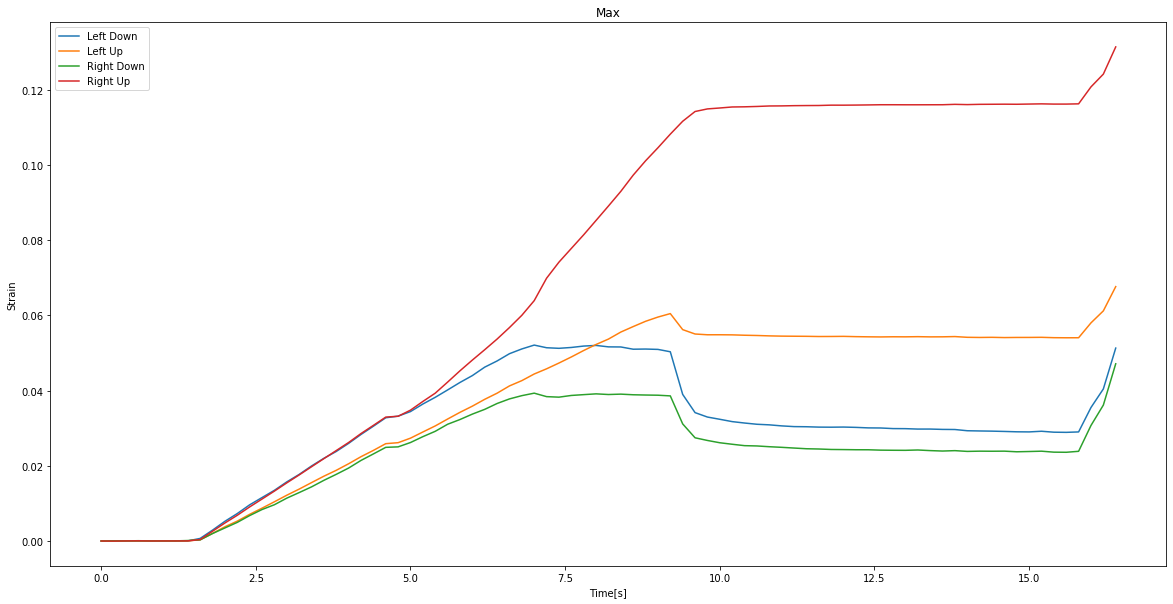

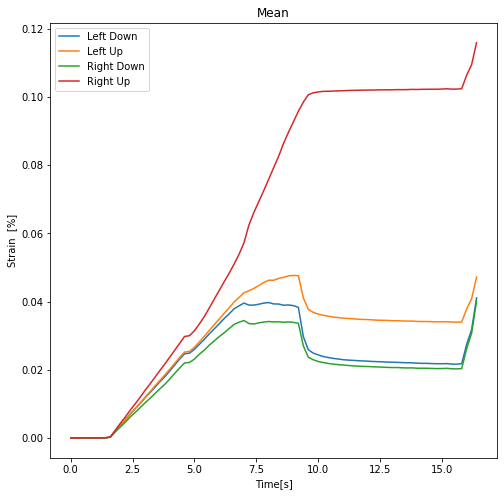

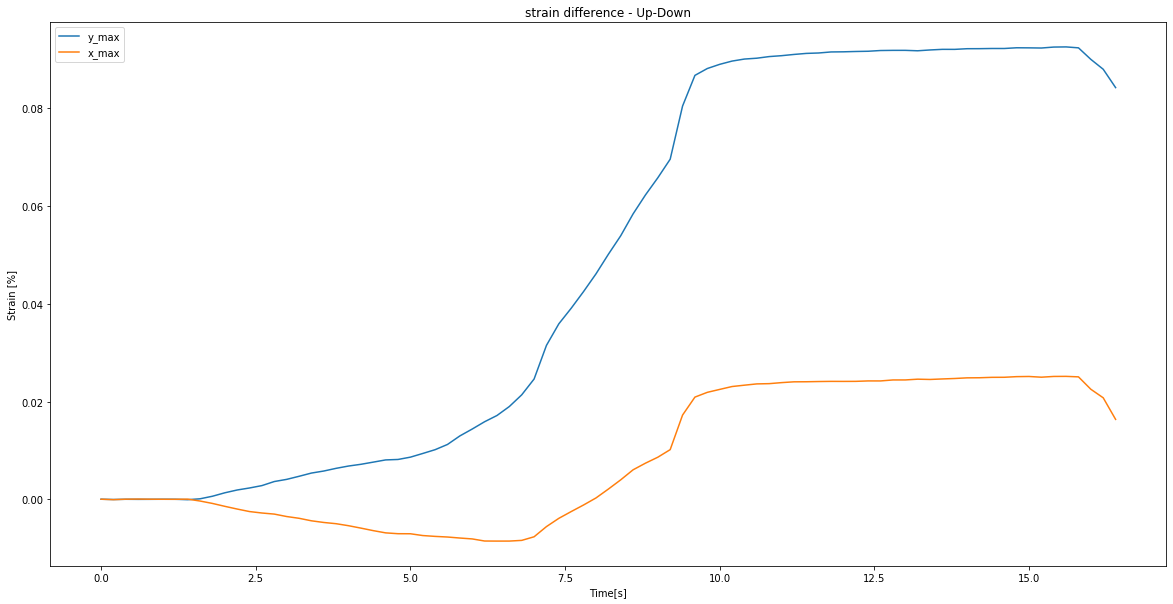

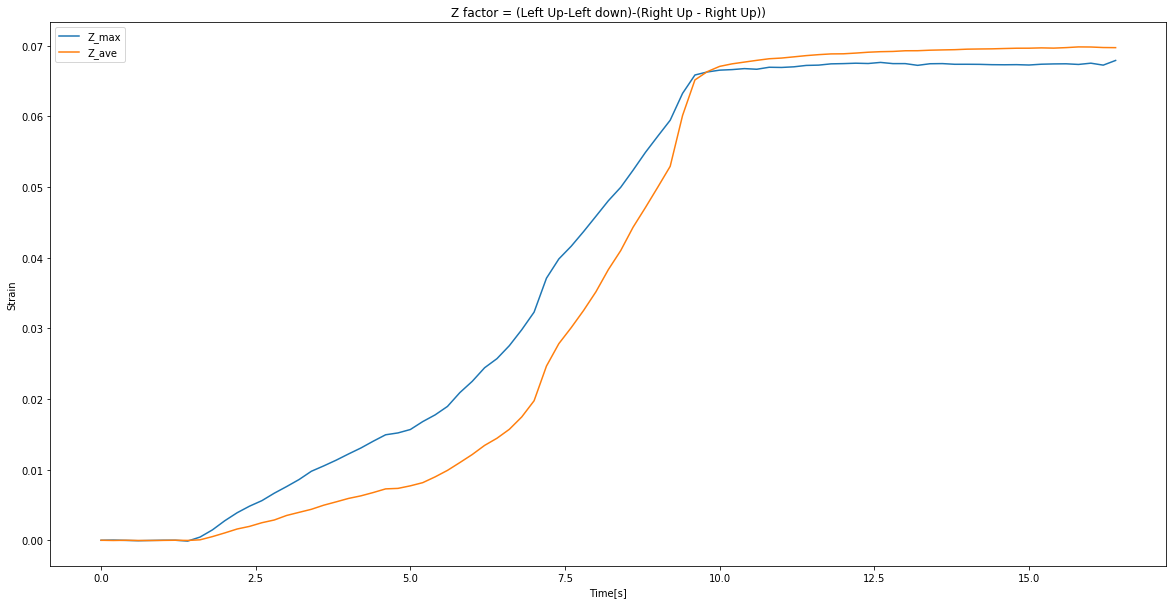

In [21]:
df_results=pd.DataFrame({'Time' : dfAreaLeftDown[0]})
#df_results['Time']=dfAreaLeftDown[0]
df_results['x1_max'] = dfAreaLeftDown[[1,2,3,4,5,6]].values.max(1)
df_results['y1_max'] = dfAreaRightDown[[1,2,3,4,5,6]].values.max(1)
df_results['x2_max'] = dfAreaLeftUp[[1,2,3,4,5,6]].values.max(1)
df_results['y2_max'] = dfAreaRightUp[[1,2,3,4,5,6]].values.max(1)
df_results['y_max'] = (df_results['y2_max']-df_results['y1_max'])
df_results['x_max'] = (df_results['x2_max']-df_results['x1_max'])
df_results['Z_max'] = df_results['y_max']-df_results['x_max']


df_results['x1_ave'] = dfAreaLeftDown[[1,2,3,4,5,6]].mean(axis=1)
df_results['y1_ave'] = dfAreaRightDown[[1,2,3,4,5,6]].mean(axis=1)
df_results['x2_ave'] = dfAreaLeftUp[[1,2,3,4,5,6]].mean(axis=1)
df_results['y2_ave'] = dfAreaRightUp[[1,2,3,4,5,6]].mean(axis=1)
df_results['y_ave'] = (df_results['y2_ave']-df_results['y1_ave'])
df_results['x_ave'] = (df_results['x2_ave']-df_results['x1_ave'])
df_results['Z_ave'] = df_results['y_ave']-df_results['x_ave']



df_results['visionInstronComparision_1'] = dfInstronVisionComparison.iloc[:, 1]
df_results['visionInstronComparision_2'] = dfInstronVisionComparison.iloc[:, 2]

print(df_results.head())
df_results.to_excel(test_name+'.xlsx')

plt.figure(figsize=(20,10))
plt.ylabel('Strain')
plt.xlabel('Time[s]')
plt.title('Max')
#plt.xlim([100,210])
#plt.ylim([-0.1,0.3])
plt.plot(df_results['Time'],df_results['x1_max'],label = 'Left Down')
plt.plot(df_results['Time'],df_results['x2_max'],label = 'Left Up')
plt.plot(df_results['Time'],df_results['y1_max'],label = 'Right Down')
plt.plot(df_results['Time'],df_results['y2_max'],label = 'Right Up')
plt.legend()
plt.show()


plt.figure(figsize=(8,8))
plt.ylabel('Strain  [%]')
plt.xlabel('Time[s]')
plt.title('Mean')
#plt.xlim([100,210])
#plt.ylim([-0.1,0.3])
plt.plot(df_results['Time'],df_results['x1_ave'],label = 'Left Down')
plt.plot(df_results['Time'],df_results['x2_ave'],label = 'Left Up')
plt.plot(df_results['Time'],df_results['y1_ave'],label = 'Right Down')
plt.plot(df_results['Time'],df_results['y2_ave'],label = 'Right Up')
plt.legend()
plt.show()

plt.figure(figsize=(20,10))
plt.ylabel('Strain [%]')
plt.xlabel('Time[s]')
plt.title('strain difference - Up-Down')
#plt.xlim([100,210])
#plt.ylim([-0.1,0.3])
plt.plot(df_results['Time'],df_results['y_max'],label = 'y_max')
plt.plot(df_results['Time'],df_results['x_max'],label = 'x_max')

plt.legend()
plt.show()
plt.figure(figsize=(20,10))
plt.ylabel('Strain')
plt.xlabel('Time[s]')
plt.title('Z factor = (Left Up-Left down)-(Right Up - Right Up))')
#plt.xlim([100,210])
#plt.ylim([-0.1,0.3])
plt.plot(df_results['Time'],df_results['Z_max'],label = 'Z_max')
plt.plot(df_results['Time'],df_results['Z_ave'],label = 'Z_ave')

plt.legend()
plt.show()

plt.figure(figsize=(20,10))
plt.ylabel('Disp [pixels]')
plt.xlabel('frame')
plt.title('Disp')
plt.xlim([80, 220])
#plt.ylim([-3, 4])
for n in range(np.shape(posArray)[0]-1):

    plt.plot(df['Point'+str(n)+'_x'],label = 'Point'+str(n)+'_x')
plt.legend()
plt.show()

In [22]:
import numpy as np
import pandas as pd
import scipy
from matplotlib import pyplot as plt
from skimage import io





kolumnaT='Total Time (s)' #Nazwa kolumny do importu - czas[s]
kolumnaF='Load(8800 (0,1):Load) (kN)'#j.w. siła
kolumnaD='Position(8800 (0,1):Position) (mm)'#j.w. przemieszczenie
kolumnaE='Strain(8800 (0,1):Position) (%)'#j.w. odkształcenie ekstensometru


In [94]:
probe = pd.read_csv('D:/OneDrive/PHD/Martyna-probki_z_karbem_05-2021/csv_0_dni/0_anterior_sample8.csv', delimiter=';',decimal=',', usecols=[kolumnaT,kolumnaD,kolumnaF, kolumnaE])
#probe.columns = [c.replace(' ', '_') for c in probe.columns]

probe[kolumnaD]=probe[kolumnaD]-probe[kolumnaD].iloc[0]
probe[kolumnaT]=probe[kolumnaT]-probe[kolumnaT].iloc[0]
probe[kolumnaF]=probe[kolumnaF]-probe[kolumnaF].iloc[0]
probe[kolumnaE]=(probe[kolumnaE]-probe[kolumnaE].iloc[0])/100


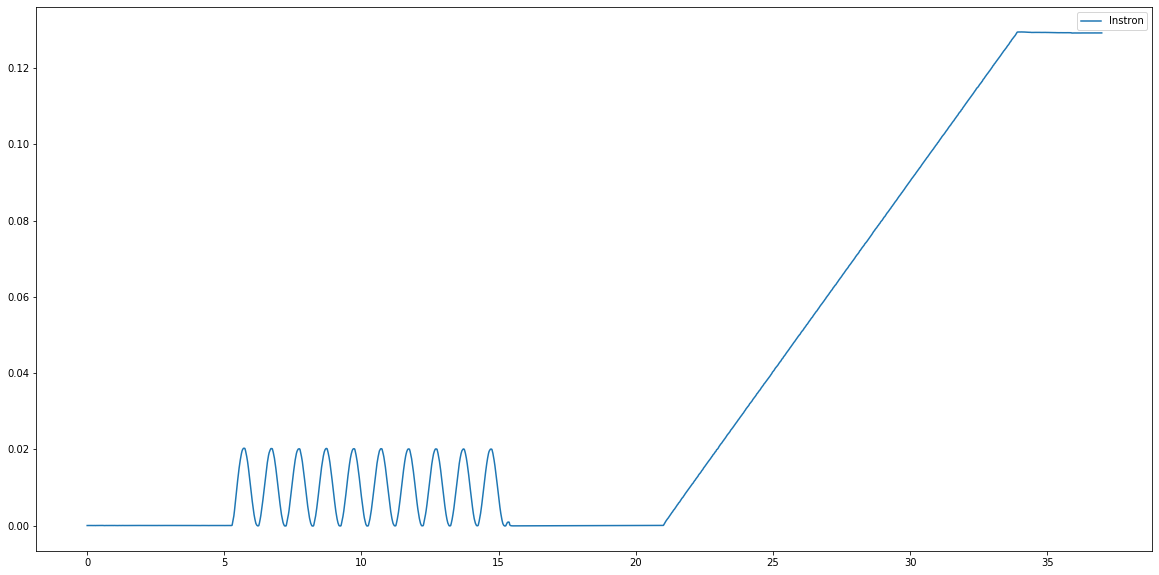

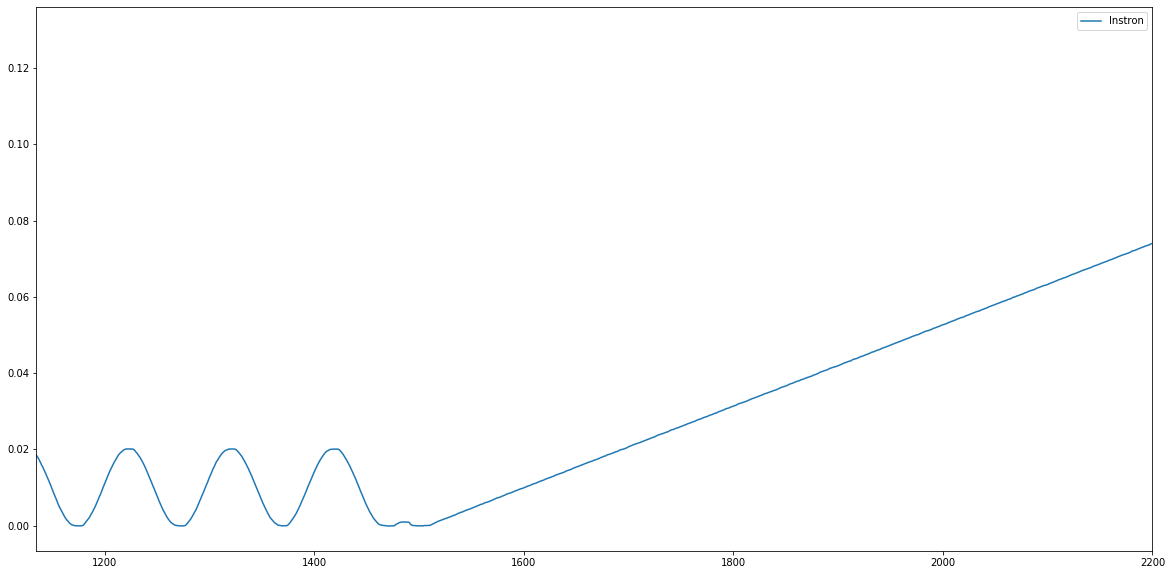

In [95]:
plt.figure(figsize=(20,10))
plt.plot(probe[kolumnaT],probe[kolumnaE],label = 'Instron') #próbki testowe
#plt.plot(probe['Point17_y'],label = 'Point17_y')
plt.legend()
plt.show()

plt.figure(figsize=(20,10))
plt.xlim([1135, 2200])
plt.plot(probe[kolumnaE],label = 'Instron') #próbki testowe
#plt.plot(probe['Point17_y'],label = 'Point17_y')
plt.legend()
plt.show()




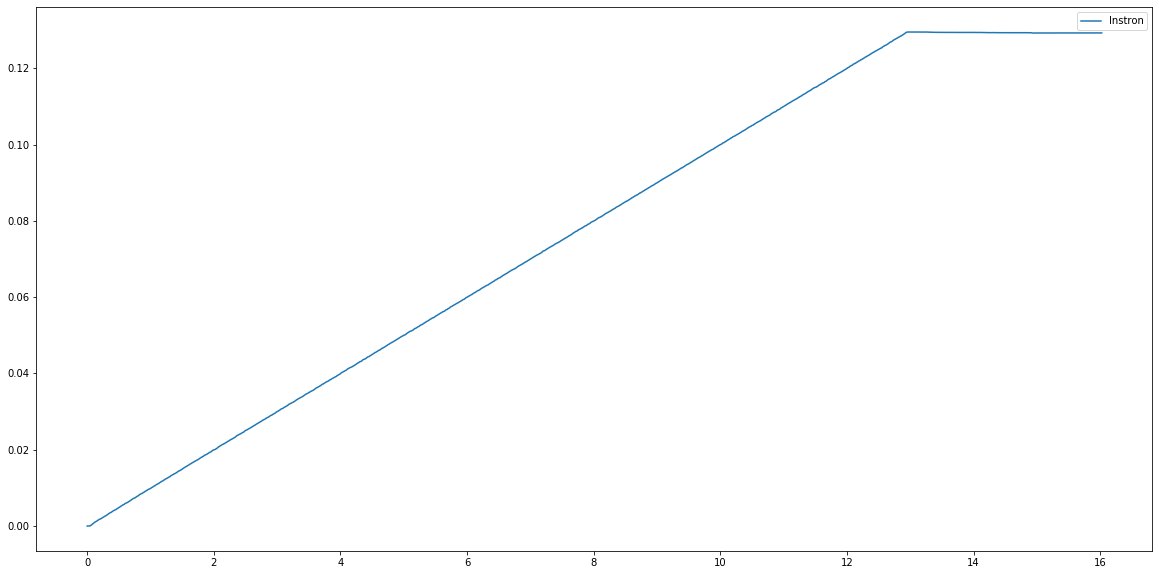

In [96]:

probe = probe.iloc[1505:]
probe[kolumnaT]=probe[kolumnaT]-probe[kolumnaT].iloc[0]

plt.figure(figsize=(20,10))
plt.plot(probe[kolumnaT],probe[kolumnaE],label = 'Instron') #próbki testowe
#plt.plot(probe['Point17_y'],label = 'Point17_y')
plt.legend()
plt.show()

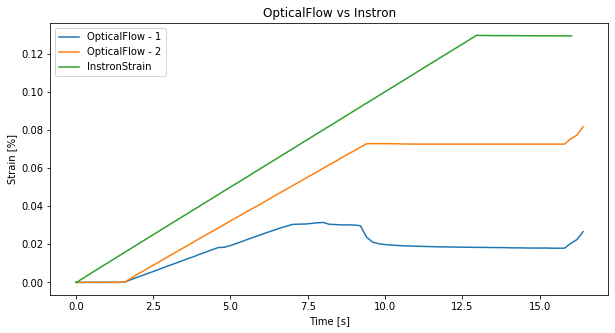

In [97]:
plt.figure(figsize=(10,5))
plt.ylabel('Strain [%]')
plt.xlabel('Time [s]')
plt.title('OpticalFlow vs Instron')
#plt.xlim([50,250])
#plt.ylim([-0.1,0.5])
plt.plot(dfInstronVisionComparison[0],dfInstronVisionComparison.iloc[:, 1],label = 'OpticalFlow - 1')
plt.plot(dfInstronVisionComparison[0],dfInstronVisionComparison.iloc[:, 2],label = 'OpticalFlow - 2')
plt.plot(probe[kolumnaT],probe[kolumnaE],label = 'InstronStrain') #próbki testowe
#plt.plot(probe['Point17_y'],label = 'Point17_y')
plt.legend()
plt.show()